In [924]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

In [925]:
df = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/clean_data/all_neighborhoods_clean.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(5)

,Type,Year built,Heating,Cooling,Parking,HOA,Total Price,Address,Square Feet,New construction,...,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,zip,median_nhv,Parking_Binned,cool_temp,Bathrooms_adj
0,Condo,1910.0,Gas,Central,NaN,No,249900.0,"5329 S Harper Ave #2, Chicago, IL 60615",1000.0,No,...,2.0,2.0,Home values in Hyde Park have risen 0.6 % (↑) ...,https://www.zillow.com/homedetails/5329-S-Harp...,0,60615,174250.0,No,Central,0.0
1,Single Family,1957.0,Forced air,Central,2 spaces,Yes,399000.0,"7144 N Ozark Ave, Chicago, IL 60631",1224.0,No,...,2.0,2.0,Home values in Edison Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/7144-N-Ozar...,0,60631,515000.0,Yes,Central,0.0
2,Condo,2007.0,Forced air,Central,NaN,No,169898.0,"1673 W Farwell Ave APT 1S, Chicago, IL 60626",775.0,No,...,1.0,1.0,Home values in Rogers Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/1673-W-Farw...,0,60626,194900.0,No,Central,0.0
3,Condo,2008.0,Gas,Central,2 spaces,No,489900.0,"1400 S Michigan Ave APT 2203, Chicago, IL 60605",1273.0,No,...,2.0,2.0,Home values in South Loop have risen 0.6 % (↑)...,https://www.zillow.com/homedetails/1400-S-Mich...,0,60605,465000.0,Yes,Central,0.0
4,Single Family,1971.0,Forced air,Central,4 spaces,Yes,389000.0,"10606 S Leavitt St, Chicago, IL 60643",2179.0,No,...,3.0,2.0,Home values in Beverly have risen 0.6 % (↑) ov...,https://www.zillow.com/homedetails/10606-S-Lea...,1,60643,154900.0,Yes,Central,1.0


In [926]:
df

,Type,Year built,Heating,Cooling,Parking,HOA,Total Price,Address,Square Feet,New construction,...,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,zip,median_nhv,Parking_Binned,cool_temp,Bathrooms_adj
0,Condo,1910.0,Gas,Central,NaN,No,249900.0,"5329 S Harper Ave #2, Chicago, IL 60615",1000.0,No,...,2.0,2.0,Home values in Hyde Park have risen 0.6 % (↑) ...,https://www.zillow.com/homedetails/5329-S-Harp...,0,60615,174250.0,No,Central,0.0
1,Single Family,1957.0,Forced air,Central,2 spaces,Yes,399000.0,"7144 N Ozark Ave, Chicago, IL 60631",1224.0,No,...,2.0,2.0,Home values in Edison Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/7144-N-Ozar...,0,60631,515000.0,Yes,Central,0.0
2,Condo,2007.0,Forced air,Central,NaN,No,169898.0,"1673 W Farwell Ave APT 1S, Chicago, IL 60626",775.0,No,...,1.0,1.0,Home values in Rogers Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/1673-W-Farw...,0,60626,194900.0,No,Central,0.0
3,Condo,2008.0,Gas,Central,2 spaces,No,489900.0,"1400 S Michigan Ave APT 2203, Chicago, IL 60605",1273.0,No,...,2.0,2.0,Home values in South Loop have risen 0.6 % (↑)...,https://www.zillow.com/homedetails/1400-S-Mich...,0,60605,465000.0,Yes,Central,0.0
4,Single Family,1971.0,Forced air,Central,4 spaces,Yes,389000.0,"10606 S Leavitt St, Chicago, IL 60643",2179.0,No,...,3.0,2.0,Home values in Beverly have risen 0.6 % (↑) ov...,https://www.zillow.com/homedetails/10606-S-Lea...,1,60643,154900.0,Yes,Central,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,Condo,2005.0,Forced air,Central,1 space,No,168999.0,"9440 S 51st Ave APT 502, Oak Lawn, IL 60453",1052.0,No,...,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9440-S-51st...,0,60453,121212.5,Yes,Central,0.0
2596,Single Family,1973.0,Gas,Central,2 spaces,Yes,399900.0,"9246 S Keeler Ave, Oak Lawn, IL 60453",3400.0,No,...,3.0,3.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9246-S-Keel...,0,60453,245170.0,Yes,Central,0.0
2597,Condo,1973.0,Other,Refrigeration,1 space,No,94500.0,"4929 W 87th St APT 3NW, Oak Lawn, IL 60453",852.0,No,...,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/4929-W-87th...,0,60453,121212.5,Yes,Refrigeration,0.0
2598,Single Family,1949.0,"Forced air, Gas",Central,2 spaces,Yes,249900.0,"9117 S 53rd Ct, Oak Lawn, IL 60453",1343.0,No,...,2.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9117-S-53rd...,1,60453,245170.0,Yes,Central,1.0


In [927]:
upper = df['Total Price'].quantile(.05)
lower = df['Total Price'].quantile(.95)
df = df[df['Total Price'].between(upper,lower)].copy()
# df.drop(columns=['zip'],inplace=True)

In [928]:
df

,Type,Year built,Heating,Cooling,Parking,HOA,Total Price,Address,Square Feet,New construction,...,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,zip,median_nhv,Parking_Binned,cool_temp,Bathrooms_adj
0,Condo,1910.0,Gas,Central,NaN,No,249900.0,"5329 S Harper Ave #2, Chicago, IL 60615",1000.0,No,...,2.0,2.0,Home values in Hyde Park have risen 0.6 % (↑) ...,https://www.zillow.com/homedetails/5329-S-Harp...,0,60615,174250.0,No,Central,0.0
1,Single Family,1957.0,Forced air,Central,2 spaces,Yes,399000.0,"7144 N Ozark Ave, Chicago, IL 60631",1224.0,No,...,2.0,2.0,Home values in Edison Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/7144-N-Ozar...,0,60631,515000.0,Yes,Central,0.0
2,Condo,2007.0,Forced air,Central,NaN,No,169898.0,"1673 W Farwell Ave APT 1S, Chicago, IL 60626",775.0,No,...,1.0,1.0,Home values in Rogers Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/1673-W-Farw...,0,60626,194900.0,No,Central,0.0
3,Condo,2008.0,Gas,Central,2 spaces,No,489900.0,"1400 S Michigan Ave APT 2203, Chicago, IL 60605",1273.0,No,...,2.0,2.0,Home values in South Loop have risen 0.6 % (↑)...,https://www.zillow.com/homedetails/1400-S-Mich...,0,60605,465000.0,Yes,Central,0.0
4,Single Family,1971.0,Forced air,Central,4 spaces,Yes,389000.0,"10606 S Leavitt St, Chicago, IL 60643",2179.0,No,...,3.0,2.0,Home values in Beverly have risen 0.6 % (↑) ov...,https://www.zillow.com/homedetails/10606-S-Lea...,1,60643,154900.0,Yes,Central,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,Single Family,1966.0,Gas,Central,2 spaces,Yes,297900.0,"10429 S Knox Ave, Oak Lawn, IL 60453",1292.0,No,...,2.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/10429-S-Kno...,1,60453,245170.0,Yes,Central,1.0
2595,Condo,2005.0,Forced air,Central,1 space,No,168999.0,"9440 S 51st Ave APT 502, Oak Lawn, IL 60453",1052.0,No,...,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9440-S-51st...,0,60453,121212.5,Yes,Central,0.0
2596,Single Family,1973.0,Gas,Central,2 spaces,Yes,399900.0,"9246 S Keeler Ave, Oak Lawn, IL 60453",3400.0,No,...,3.0,3.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9246-S-Keel...,0,60453,245170.0,Yes,Central,0.0
2598,Single Family,1949.0,"Forced air, Gas",Central,2 spaces,Yes,249900.0,"9117 S 53rd Ct, Oak Lawn, IL 60453",1343.0,No,...,2.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9117-S-53rd...,1,60453,245170.0,Yes,Central,1.0


In [929]:
# median_zip = dict(df.groupby('zip')['Square Feet'].median())

# # year_built_dict = dict(df.groupby('zip')['Year built'].median())
# df['Square Feet'] = df['Square Feet'].fillna(df.zip.map(median_zip))
# df['Square Feet'].fillna(df['Square Feet'].mean(), inplace=True)

In [930]:
df['zip'] = df.zip.astype(str)

In [931]:
# def get_median_zip(x):
#     median_zip_dict = dict(df.groupby('zip')['Total Price'].median())
#     return median_zip_dict[x]
# df['median_zip'] = df.zip.apply(get_median_zip)

In [932]:
continous_data = df.select_dtypes(['float64', 'int64'])
continous_data.head(5)

,Year built,Total Price,Square Feet,Bedrooms,Bathrooms,Full bathrooms,Half bathrooms,median_nhv,Bathrooms_adj
0,1910.0,249900.0,1000.0,2.0,2.0,2.0,0,174250.0,0.0
1,1957.0,399000.0,1224.0,2.0,2.0,2.0,0,515000.0,0.0
2,2007.0,169898.0,775.0,2.0,1.0,1.0,0,194900.0,0.0
3,2008.0,489900.0,1273.0,2.0,2.0,2.0,0,465000.0,0.0
4,1971.0,389000.0,2179.0,3.0,3.0,2.0,1,154900.0,1.0


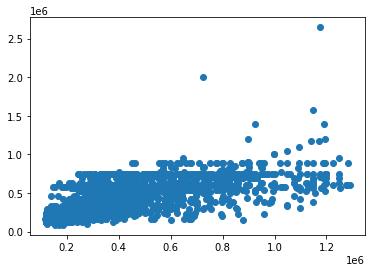

In [933]:
plt.scatter(continous_data['Total Price'], continous_data['median_nhv'])

In [934]:
categorical_data = df.select_dtypes(['object'])
categorical_data.head(5)

,Type,Heating,Cooling,Parking,HOA,Address,New construction,neighborhood_stats,URL,zip,Parking_Binned,cool_temp
0,Condo,Gas,Central,NaN,No,"5329 S Harper Ave #2, Chicago, IL 60615",No,Home values in Hyde Park have risen 0.6 % (↑) ...,https://www.zillow.com/homedetails/5329-S-Harp...,60615,No,Central
1,Single Family,Forced air,Central,2 spaces,Yes,"7144 N Ozark Ave, Chicago, IL 60631",No,Home values in Edison Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/7144-N-Ozar...,60631,Yes,Central
2,Condo,Forced air,Central,NaN,No,"1673 W Farwell Ave APT 1S, Chicago, IL 60626",No,Home values in Rogers Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/1673-W-Farw...,60626,No,Central
3,Condo,Gas,Central,2 spaces,No,"1400 S Michigan Ave APT 2203, Chicago, IL 60605",No,Home values in South Loop have risen 0.6 % (↑)...,https://www.zillow.com/homedetails/1400-S-Mich...,60605,Yes,Central
4,Single Family,Forced air,Central,4 spaces,Yes,"10606 S Leavitt St, Chicago, IL 60643",No,Home values in Beverly have risen 0.6 % (↑) ov...,https://www.zillow.com/homedetails/10606-S-Lea...,60643,Yes,Central


In [935]:
categorical_data.columns.to_list()

['Type',
 'Heating',
 'Cooling',
 'Parking',
 'HOA',
 'Address',
 'New construction',
 'neighborhood_stats',
 'URL',
 'zip',
 'Parking_Binned',
 'cool_temp']

In [936]:
a = pd.get_dummies(categorical_data[['Type', 'Cooling', 'HOA', 'Parking_Binned', 'zip', 'New construction']], drop_first=True)



a

,Type_Multi Family,Type_Multiple Occupancy,Type_Single Family,Type_Townhouse,Cooling_None,Cooling_Other,Cooling_Refrigeration,Cooling_Wall,HOA_Yes,Parking_Binned_Yes,...,zip_60654,zip_60655,zip_60656,zip_60657,zip_60659,zip_60660,zip_60661,zip_60707,zip_60804,New construction_ Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2595,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2596,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2598,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [937]:
test = continous_data.join(a)
test.isna().sum().sort_values(ascending=False)

Square Feet              319
New construction_ Yes      0
zip_60601                  0
zip_60203                  0
zip_60301                  0
                        ... 
zip_60632                  0
zip_60633                  0
zip_60634                  0
zip_60636                  0
Year built                 0
Length: 92, dtype: int64

In [938]:
test.dropna(inplace=True)

In [939]:
corrs = test.corr()['Total Price'].sort_values(ascending=False).to_frame().head(50)
corrs

,Total Price
Total Price,1.000000
Bathrooms,0.720522
Square Feet,0.697469
median_nhv,0.684874
Full bathrooms,0.624940
Bedrooms,0.496367
Half bathrooms,0.428464
New construction_ Yes,0.270707
Type_Single Family,0.251783
Bathrooms_adj,0.226760


In [940]:
features_full = corrs.index.to_list()[1::]
features

,importance
feature,
Square Feet,0.494849
median_nhv,0.191428
Bathrooms,0.148704
Year built,0.062256
long,0.047762
lat,0.031578
New construction_ Yes,0.012538
Bedrooms,0.010885


In [941]:
# sns.pairplot(test_fixed.iloc[:,0:9])

In [942]:
# plt.scatter(test_fixed['Total Price'], np.log2((test_fixed['median_nhv'])))

In [943]:
X = test[features]
y = test['Total Price']

In [944]:
X.isna().sum()

Year built               2021
Total Price              2021
Square Feet              2021
Bedrooms                 2021
Bathrooms                2021
                         ... 
zip_60660                2021
zip_60661                2021
zip_60707                2021
zip_60804                2021
New construction_ Yes    2021
Length: 92, dtype: int64

In [945]:
features = [item for item in continous_data.columns.to_list() if item!='Total Price']
features

['Year built',
 'Square Feet',
 'Bedrooms',
 'Bathrooms',
 'Full bathrooms',
 'Half bathrooms',
 'median_nhv',
 'Bathrooms_adj']

In [946]:
continous_clean = continous_data.dropna()

In [947]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

continous_clean = continous_data.dropna()

X = continous_clean[features]
y = continous_clean['Total Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X = sm.add_constant(X)  # We want our model to include a constant value (modeled by the y-intercept)
# Fit model with target as housing price index
lm_2 = sm.OLS(y, X)  # Notice that `y` is first here

lm_2 = lm_2.fit()

# summarize our model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     700.8
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:44:11   Log-Likelihood:                -26707.
No. Observations:                2021   AIC:                         5.343e+04
Df Residuals:                    2013   BIC:                         5.347e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.587e+05   1.78e+05     -4.818      0.000   -1.21e+06   -5.09e+05
Year built       415.0598     90.653      4.579      0.000     237.276     592.844
Square Feet       65.7671      4.229     15.551      0.000      57.473      74.061
Bedrooms       -7697.3976   3458.145     -2.226      0.026   -1.45e+04    -915.481
Bathrooms       4.144e+04   3699.730     11.200      0.000    3.42e+04    4.87e+04
Full bathrooms  3.465e+04   2477.122     13.990      0.000    2.98e+04    3.95e+04
Half bathrooms -5627.9963   7808.101     -0.721      0.471   -2.09e+04    9684.807
median_nhv         0.4682      0.016     28.877      0.000       0.436       0.500
Bathrooms_adj   6782.7854   3737.064      1.815      0.070    -546.133    1.41e+04
==============================================================================
Omnibus:                      476.422   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1891.151
Skew:                           1.098   Prob(JB):                         0.00
Kurtosis:                       7.200   Cond. No.                     3.09e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.72e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [948]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1000)


model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7129819096786298
0.698529836823832


(array([122., 193., 118.,  87.,  48.,  27.,  10.,   0.,   1.,   1.]),
 array([ 106827.9235544 ,  249396.88231407,  391965.84107373,
         534534.79983339,  677103.75859305,  819672.71735272,
         962241.67611238, 1104810.63487204, 1247379.5936317 ,
        1389948.55239137, 1532517.51115103]),
 <BarContainer object of 10 artists>)

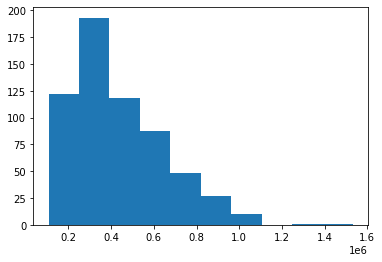

In [949]:
plt.hist(model.predict(X_test), bins=10)

In [950]:
preds = model.predict(X_test)
actuals = y_test

err = abs(preds - actuals)
err.mean()


96735.94539111822

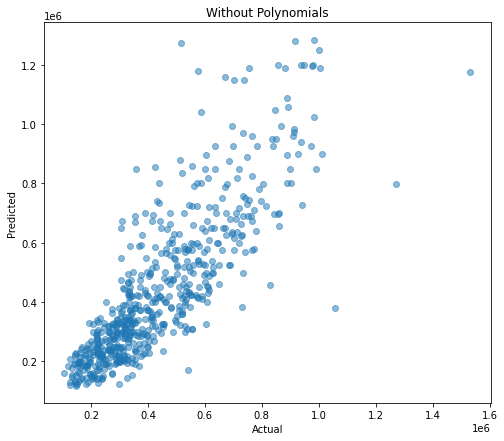

In [951]:

plt.figure(figsize=[8, 7])
plt.title('Without Polynomials')
plt.scatter(model.predict(X_test), y_test, alpha=.5)
plt.xlabel('Actual')
plt.ylabel('Predicted');
plt.savefig('Residuals1.pdf')

In [952]:
test[features]

,Year built,Square Feet,Bedrooms,Bathrooms,Full bathrooms,Half bathrooms,median_nhv,Bathrooms_adj
0,1910.0,1000.0,2.0,2.0,2.0,0,174250.0,0.0
1,1957.0,1224.0,2.0,2.0,2.0,0,515000.0,0.0
2,2007.0,775.0,2.0,1.0,1.0,0,194900.0,0.0
3,2008.0,1273.0,2.0,2.0,2.0,0,465000.0,0.0
4,1971.0,2179.0,3.0,3.0,2.0,1,154900.0,1.0
...,...,...,...,...,...,...,...,...
2594,1966.0,1292.0,3.0,2.0,1.0,1,245170.0,1.0
2595,2005.0,1052.0,1.0,1.0,1.0,0,121212.5,0.0
2596,1973.0,3400.0,4.0,3.0,3.0,0,245170.0,0.0
2598,1949.0,1343.0,3.0,2.0,1.0,1,245170.0,1.0


In [953]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X = test[features_full]
y = test['Total Price']
poly_x = PolynomialFeatures(2).fit_transform(X)
s = StandardScaler(with_mean=True)
poly_scaled = s.fit_transform(poly_x)

X_train, X_test, y_train, y_test = train_test_split(poly_scaled, y, test_size=0.30, random_state=100)


In [954]:
from sklearn.linear_model import RidgeCV, LassoCV

m = RidgeCV()
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.8725259616784891

In [955]:
m.score(X_test, y_test)

0.7564548135819827

In [956]:
preds = m.predict(X_test)
actuals = y_test

err = abs(preds - actuals)
err.mean()


81370.34180357393

In [957]:
error_df = pd.DataFrame({'predict': preds, 'actual': actuals})

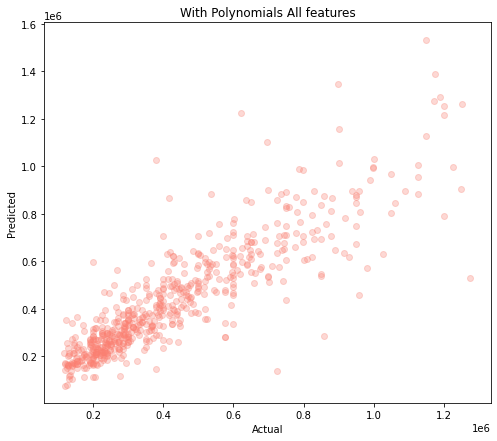

In [958]:
# plt.scatter(X_train, y_train,color='g')

plt.figure(figsize=[8, 7])
plt.title('With Polynomials All features')
plt.scatter(y_test, m.predict(X_test),color='salmon', alpha=.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('Residuals2.pdf')

(array([102., 198., 120.,  92.,  42.,  30.,  11.,   5.,   5.,   2.]),
 array([  76899.93509089,  222561.66412402,  368223.39315714,
         513885.12219027,  659546.85122339,  805208.58025652,
         950870.30928964, 1096532.03832277, 1242193.7673559 ,
        1387855.49638902, 1533517.22542215]),
 <BarContainer object of 10 artists>)

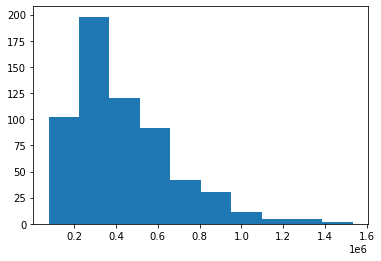

In [959]:
plt.hist(preds, bins=10)

In [905]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7878383141687639

In [ ]:
pwd

In [174]:
df2 = df.copy()

In [177]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geopy/2.0.0")
location = geolocator.geocode("910 west lake street, chicago il, 60607")

def get_coordinates(x):
    
    try:
        geolocator = Nominatim(user_agent="geopy/2.0.0")
        location = geolocator.geocode(x)
        if location != None:
            print(list(location[-1]))
            return list(location[-1])
        else:
            print(x)
            return np.nan
    except:
        return np.nan

# going to have to remove apartment numbers before you can do get geo location... 
df2['lat-long'] = df2.zip.apply(get_coordinates)

[41.7978199, -87.5826917]
[41.9406109, -87.8359718]
[41.9984912, -87.6601622]
[41.8659983, -87.6082237]
[41.721453857169905, -87.66810038006267]
[41.8884984, -87.6292815]
[41.8626357, -87.6687915]
[41.91891075738992, -87.6991150963385]
[41.971754749104015, -87.66380257273713]
[41.96563542478102, -87.76217533198017]
[41.923732, -87.64271]
[41.95241383905949, -87.66094331593176]
[41.8884984, -87.6292815]
[41.8883951, -87.652206]
[41.9938166392078, -87.6939572424597]
[41.943891509558306, -87.79323459610708]
[49.27315905, 2.366472858771666]
[41.9938166392078, -87.6939572424597]
[41.7470099, -87.7386309]
[41.890555, -87.687272]
[41.944459701127215, -87.69990673968732]
[41.90248420972337, -87.65622711340458]
[41.8659983, -87.6082237]
[41.7470099, -87.7386309]
[41.96563542478102, -87.76217533198017]
[41.7348536, -87.6754295]
[41.95241383905949, -87.66094331593176]
[41.971754749104015, -87.66380257273713]
[41.8659983, -87.6082237]
[41.8249226, -87.6381346]
[41.88275569326235, -87.6365436862392

[41.923732, -87.64271]
[41.74719266703149, -87.60341260570912]
[41.89142632275252, -87.63288854724547]
[41.91891075738992, -87.6991150963385]
[41.91891075738992, -87.6991150963385]
[41.88026201736284, -87.75046069715862]
[41.9984912, -87.6601622]
[41.923732, -87.64271]
[41.87853401167714, -87.71772033986943]
[41.96563542478102, -87.76217533198017]
[41.8659983, -87.6082237]
[41.98643541859497, -87.70616768688917]
[41.89142632275252, -87.63288854724547]
[41.923732, -87.64271]
[41.812994, -87.7506398]
[41.9919226, -87.7306736]
[41.95241383905949, -87.66094331593176]
[41.8659983, -87.6082237]
[41.8986579, -87.652408]
[41.78415811823179, -87.70679279308376]
[41.812994, -87.7506398]
[41.81798215685003, -87.60872466904641]
[41.9919226, -87.7306736]
[41.8883951, -87.652206]
[41.945695079680874, -87.74237501924017]
[41.90248420972337, -87.65622711340458]
[41.8986579, -87.652408]
[41.812994, -87.7506398]
[41.7568285, -87.5515709]
[41.89142632275252, -87.63288854724547]
[41.90248420972337, -87.65

[41.8884984, -87.6292815]
[41.78415811823179, -87.70679279308376]
[41.9610605781569, -87.69870404767025]
[41.938980491664466, -87.65598721067421]
[41.89142632275252, -87.63288854724547]
[41.9984912, -87.6601622]
[49.27315905, 2.366472858771666]
[41.84772074635308, -87.63025594964033]
[41.96563542478102, -87.76217533198017]
[41.697393736159576, -87.69751420151692]
[41.96563542478102, -87.76217533198017]
[41.8883951, -87.652206]
[41.9938166392078, -87.6939572424597]
[41.96563542478102, -87.76217533198017]
[41.84772074635308, -87.63025594964033]
[41.8986579, -87.652408]
[41.938980491664466, -87.65598721067421]
[41.8884984, -87.6292815]
[41.971754749104015, -87.66380257273713]
[41.943891509558306, -87.79323459610708]
[41.8986579, -87.652408]
[41.9284582, -87.7079265]
[41.9984912, -87.6601622]
[41.971754749104015, -87.66380257273713]
[41.84772074635308, -87.63025594964033]
[41.78415811823179, -87.70679279308376]
[41.69968359393502, -87.62341086697604]
[41.9022379, -87.6236367]
[41.699683593

[42.056512875043424, -87.70047934537321]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.05064075, -87.71585021390953]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.05064075, -87.71585021390953]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.056512875043424, -87.70047934537321]
[42.03054

[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.05064075, -87.71585021390953]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.056512875043424, -87.70047934537321]
[42.056512875043424, -87.70047934537321]
[42.056512875043424, -87.70047934537321]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.03054149315988, -87.6884674446371]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.03054149315988, -87.6884674446371]
[42.056512875043424, -87.70047934537321]
[42.

[43.49351558573582, 13.625423738195114]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.49351558573582, 13.625423738195114]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.49351558573582, 13.625423738195114]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.49351558573582, 13.625423738195114]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[42.1093974, -87.886746]
[43.49351558573582, 13.625423738195114]
[43.4281289, 13.5830042]
[42.1093974, -87.886746]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]
[43.4281289, 13.5830042]


[41.7555508, -88.1996245]
[41.7555508, -88.1996245]
[41.69509765, -88.17539203506647]
[41.7555508, -88.1996245]
[41.7555508, -88.1996245]
[41.7555508, -88.1996245]
[41.69509765, -88.17539203506647]
[41.69509765, -88.17539203506647]
[41.69509765, -88.17539203506647]
[41.7998002, -88.1202607]
[41.69509765, -88.17539203506647]
[41.7998002, -88.1202607]
[41.7555508, -88.1996245]
[41.69509765, -88.17539203506647]
[41.7555508, -88.1996245]
[41.726778350799336, -88.14007120540704]
[41.7555508, -88.1996245]
[41.7998002, -88.1202607]
[41.726778350799336, -88.14007120540704]
[41.726778350799336, -88.14007120540704]
[41.69509765, -88.17539203506647]
[41.7555508, -88.1996245]
[41.7998002, -88.1202607]
[41.7998002, -88.1202607]
[41.69509765, -88.17539203506647]
[41.726778350799336, -88.14007120540704]
[41.69509765, -88.17539203506647]
[41.69509765, -88.17539203506647]
[41.69509765, -88.17539203506647]
[41.7555508, -88.1996245]
[41.7555508, -88.1996245]
[41.69509765, -88.17539203506647]
[41.69509765

[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.873141465859824, -87.78710958929416]
[41.873141465859824, -87.78710958929416]
[41.88819362467146, -87.79962965291593]
[41.89863398355445, -87.77239321191668]
[41.88819362467146, -87.79962965291593]
[41.873141465859824, -87.78710958929416]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.873141465859824, -87.78710958929416]
[41.89863398355445, -87.77239321191668]
[41.873141465859824, -87.78710958929416]
[41.873141465859824, -87.78710958929416]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.873141465859824, -87.78710958929416]
[41.89863398355445, -87.77239321191668]
[41.873141465859824, -87.78710958929416]
[41.89863398355445, -87.77239321191668]
[41.873141465859824, -87.78710958929416]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.7723932

[41.873141465859824, -87.78710958929416]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.873141465859824, -87.78710958929416]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.88819362467146, -87.79962965291593]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.873141465859824, -87.78710958929416]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.89863398355445, -87.77239321191668]
[41.873141465859824, -87.787109589294

[42.040218699587946, -87.73687995479624]
[42.040218699587946, -87.73687995479624]
[42.033302964095945, -87.7548767179604]
[42.033302964095945, -87.7548767179604]
[42.040218699587946, -87.73687995479624]
[42.033302964095945, -87.7548767179604]
[42.033302964095945, -87.7548767179604]
[42.040218699587946, -87.73687995479624]
[42.040218699587946, -87.73687995479624]
[42.033302964095945, -87.7548767179604]
[42.033302964095945, -87.7548767179604]
[42.040218699587946, -87.73687995479624]
[42.040218699587946, -87.73687995479624]
[42.040218699587946, -87.73687995479624]
[42.033302964095945, -87.7548767179604]
[42.033302964095945, -87.7548767179604]
[42.033302964095945, -87.7548767179604]
[42.033302964095945, -87.7548767179604]
[42.040218699587946, -87.73687995479624]
[42.033302964095945, -87.7548767179604]
[42.040218699587946, -87.73687995479624]
[42.040218699587946, -87.73687995479624]
[42.033302964095945, -87.7548767179604]
[42.040218699587946, -87.73687995479624]
[42.040218699587946, -87.736

[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]
[41.714683782547496, -87.7540649839719]


In [961]:
# pd.DataFrame(df2['lat-long'].to_list())
df3 = df2['lat-long'].apply(pd.Series)
df3.columns = ['lat', 'long']

In [962]:
tree_df = df3.join(df2)
tree_df.drop(columns=['lat-long', 'Parking', 'Heating'], inplace=True)


In [963]:
tree_df.select_dtypes(float, int)

,lat,long,Year built,Total Price,Square Feet,Bedrooms,Bathrooms,Full bathrooms,median_nhv,Bathrooms_adj
0,41.797820,-87.582692,1910.0,249900.0,1000.0,2.0,2.0,2.0,174250.0,0.0
1,41.940611,-87.835972,1957.0,399000.0,1224.0,2.0,2.0,2.0,515000.0,0.0
2,41.998491,-87.660162,2007.0,169898.0,775.0,2.0,1.0,1.0,194900.0,0.0
3,41.865998,-87.608224,2008.0,489900.0,1273.0,2.0,2.0,2.0,465000.0,0.0
4,41.721454,-87.668100,1971.0,389000.0,2179.0,3.0,3.0,2.0,154900.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2595,41.714684,-87.754065,2005.0,168999.0,1052.0,1.0,1.0,1.0,121212.5,0.0
2596,41.714684,-87.754065,1973.0,399900.0,3400.0,4.0,3.0,3.0,245170.0,0.0
2597,41.714684,-87.754065,1973.0,94500.0,852.0,2.0,1.0,1.0,121212.5,0.0
2598,41.714684,-87.754065,1949.0,249900.0,1343.0,3.0,2.0,1.0,245170.0,1.0


In [964]:
from sklearn.ensemble import RandomForestRegressor


regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [965]:
regr.score(X_test, y_test)

0.8017360579178043

In [966]:
features

""


In [967]:
df2.columns.to_list()

['Type',
 'Year built',
 'Heating',
 'Cooling',
 'Parking',
 'HOA',
 'Total Price',
 'Address',
 'Square Feet',
 'New construction',
 'Bedrooms',
 'Bathrooms',
 'Full bathrooms',
 'neighborhood_stats',
 'URL',
 'Half bathrooms',
 'zip',
 'median_nhv',
 'Parking_Binned',
 'cool_temp',
 'Bathrooms_adj',
 'lat-long']

In [968]:
cont = tree_df.select_dtypes(float, int)
obj = tree_df.select_dtypes(object)

In [969]:
obj_filt = pd.get_dummies(obj[['Type', 'Cooling','HOA','New construction','Parking_Binned']], drop_first=True)
a = cont.join(obj_filt)
a

,lat,long,Year built,Total Price,Square Feet,Bedrooms,Bathrooms,Full bathrooms,median_nhv,Bathrooms_adj,...,Type_Multiple Occupancy,Type_Single Family,Type_Townhouse,Cooling_None,Cooling_Other,Cooling_Refrigeration,Cooling_Wall,HOA_Yes,New construction_ Yes,Parking_Binned_Yes
0,41.797820,-87.582692,1910.0,249900.0,1000.0,2.0,2.0,2.0,174250.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,41.940611,-87.835972,1957.0,399000.0,1224.0,2.0,2.0,2.0,515000.0,0.0,...,0,1,0,0,0,0,0,1,0,1
2,41.998491,-87.660162,2007.0,169898.0,775.0,2.0,1.0,1.0,194900.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,41.865998,-87.608224,2008.0,489900.0,1273.0,2.0,2.0,2.0,465000.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,41.721454,-87.668100,1971.0,389000.0,2179.0,3.0,3.0,2.0,154900.0,1.0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,41.714684,-87.754065,2005.0,168999.0,1052.0,1.0,1.0,1.0,121212.5,0.0,...,0,0,0,0,0,0,0,0,0,1
2596,41.714684,-87.754065,1973.0,399900.0,3400.0,4.0,3.0,3.0,245170.0,0.0,...,0,1,0,0,0,0,0,1,0,1
2597,41.714684,-87.754065,1973.0,94500.0,852.0,2.0,1.0,1.0,121212.5,0.0,...,0,0,0,0,0,1,0,0,0,1
2598,41.714684,-87.754065,1949.0,249900.0,1343.0,3.0,2.0,1.0,245170.0,1.0,...,0,1,0,0,0,0,0,1,0,1


In [970]:
a.dropna(inplace=True)

In [971]:
tree_feats = [item for item in a.columns.to_list() if item !='Total Price']
tree_feats

['lat',
 'long',
 'Year built',
 'Square Feet',
 'Bedrooms',
 'Bathrooms',
 'Full bathrooms',
 'median_nhv',
 'Bathrooms_adj',
 'Type_Multi Family',
 'Type_Multiple Occupancy',
 'Type_Single Family',
 'Type_Townhouse',
 'Cooling_None',
 'Cooling_Other',
 'Cooling_Refrigeration',
 'Cooling_Wall',
 'HOA_Yes',
 'New construction_ Yes',
 'Parking_Binned_Yes']

In [972]:
import_feats = ['Bedrooms', 'Bathrooms',
                'New construction_ Yes',
                'lat', 'Year built', 'long',
                'median_nhv', 'Square Feet']

In [973]:
X = a[import_feats]
y = a['Total Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [861]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

rfr = RandomForestRegressor(random_state=0)

max_depth_range = range(1, 11)
leaf_range = range(1, 11)
n_estimators = [100]
max_features = ['auto']

params = dict(max_depth=max_depth_range,
              min_samples_leaf=leaf_range, 
              n_estimators=n_estimators,
              max_features=max_features)

rf_grid = GridSearchCV(rfr,
                       params,
                       cv=5,
                       return_train_score=True,
                       n_jobs=-1)

rf_grid.fit(X_train, y_train)
print("Random Forest score:", rf_grid.best_score_)
print("Random Forest (best parameters)", rf_grid.best_params_)

Random Forest score: 0.7949429493999767
Random Forest (best parameters) {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}


In [974]:
rfr_final = RandomForestRegressor(max_depth=9, min_samples_leaf=1, n_estimators=200)
rfr_final.fit(X_train, y_train)
rfr_final.score(X_test, y_test)

0.8485204430615839

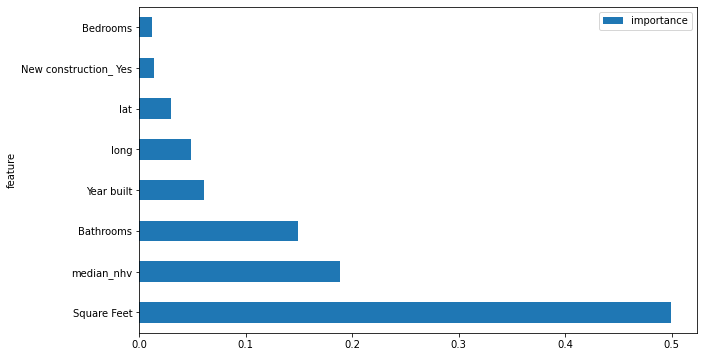

In [975]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = rfr_final.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 6))
plt.savefig('feature_importances.pdf')

In [920]:
# from sklearn import tree

# estimators = rfr_final.estimators_
# plt.figure(figsize=[500, 50])
# tree.plot_tree(estimators[0],filled=True, rounded=True, fontsize=14)
# plt.show()



In [976]:
preds = rfr_final.predict(X_test)
actuals = y_test

err = abs(preds - actuals)
err.mean()


83877.79107085266

Text(0, 0.5, 'Predicted')

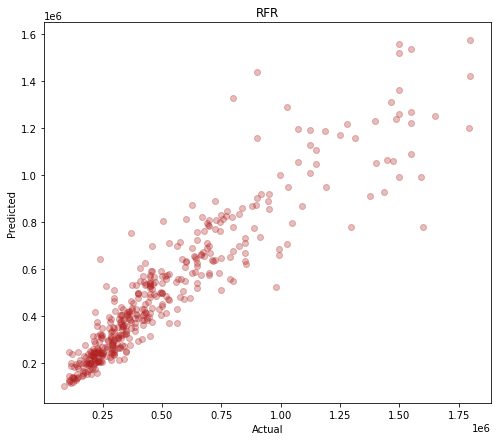

In [922]:
plt.figure(figsize=[8, 7])
plt.title('RFR')
plt.scatter(y_test, rfr_final.predict(X_test),color='firebrick', alpha=.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

(array([105., 101.,  79.,  55.,  36.,  16.,  12.,  14.,   5.,   5.]),
 array([ 104774.55462083,  252012.38823529,  399250.22184975,
         546488.05546421,  693725.88907866,  840963.72269312,
         988201.55630758, 1135439.38992203, 1282677.22353649,
        1429915.05715095, 1577152.89076541]),
 <BarContainer object of 10 artists>)

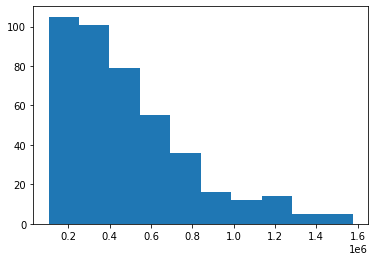

In [923]:
plt.hist(rfr_final.predict(X_test))